In [2]:
import pandas as pd
import numpy as np
from random import seed
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression


from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score

In [13]:
import sys
!{sys.executable} -m pip install xlrd

In [12]:
train=pd.read_csv("weatherAUS.csv")

In [4]:
train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [28]:
filas_ori= train.shape[0]
iT= train.shape[0]*train.shape[1]- train.isnull().sum().sum()
print("Información total",iT) 

Información total 3096073


<AxesSubplot:>

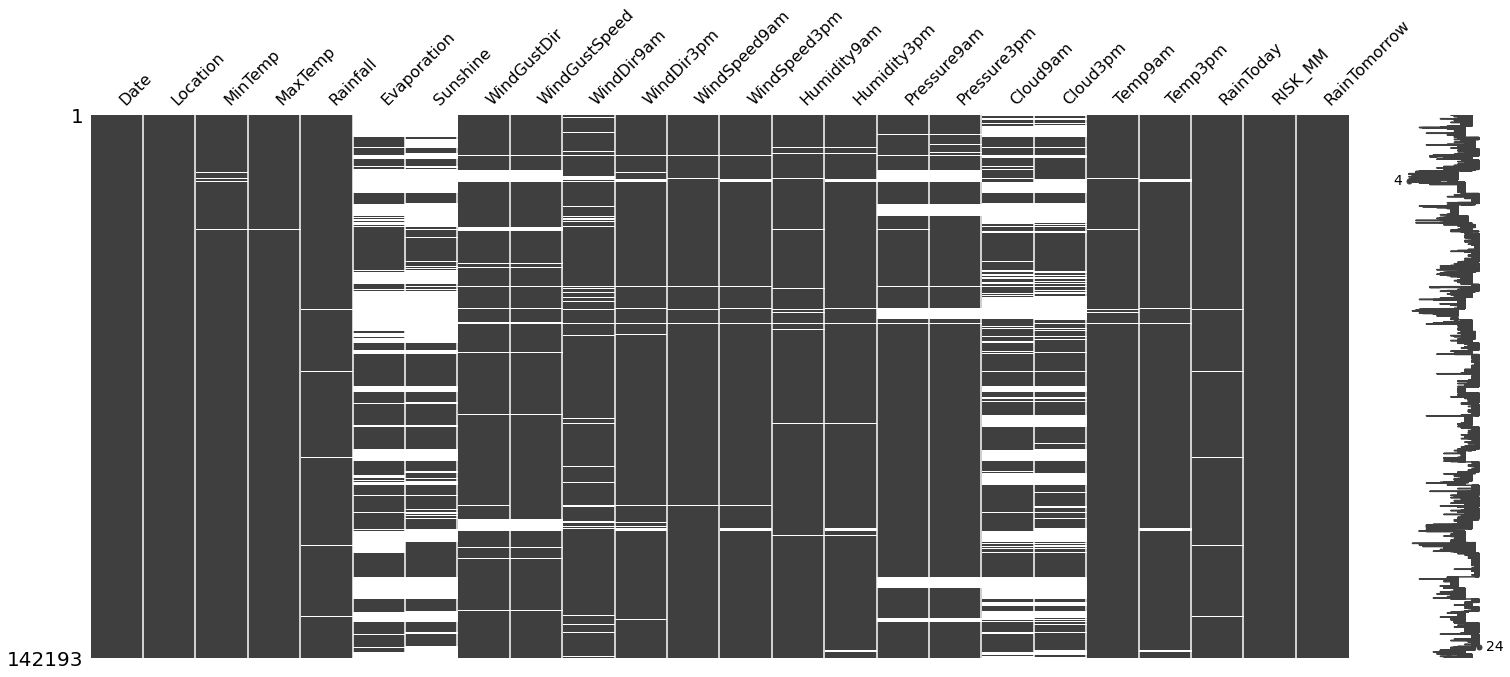

In [5]:

import missingno as msno 
msno.matrix(train)

<AxesSubplot:>

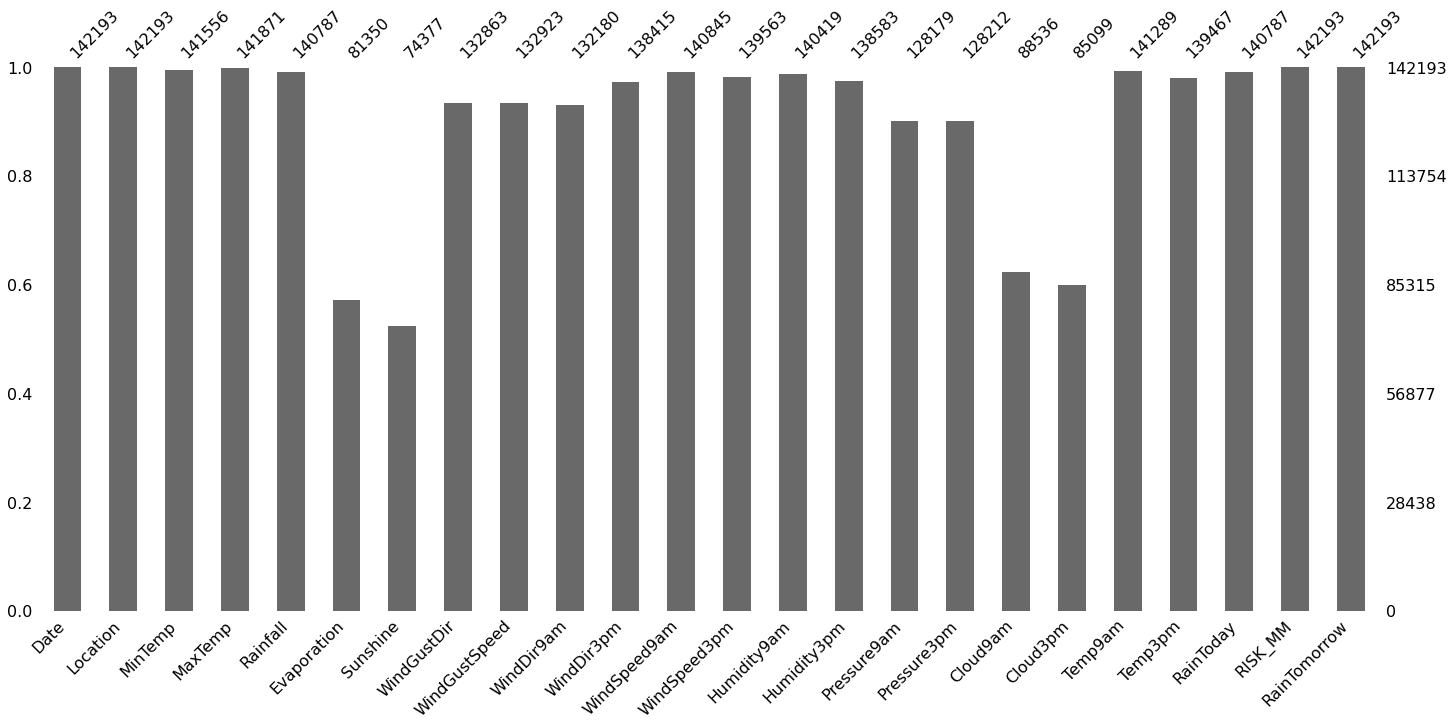

In [90]:
msno.bar(train) 

<AxesSubplot:>

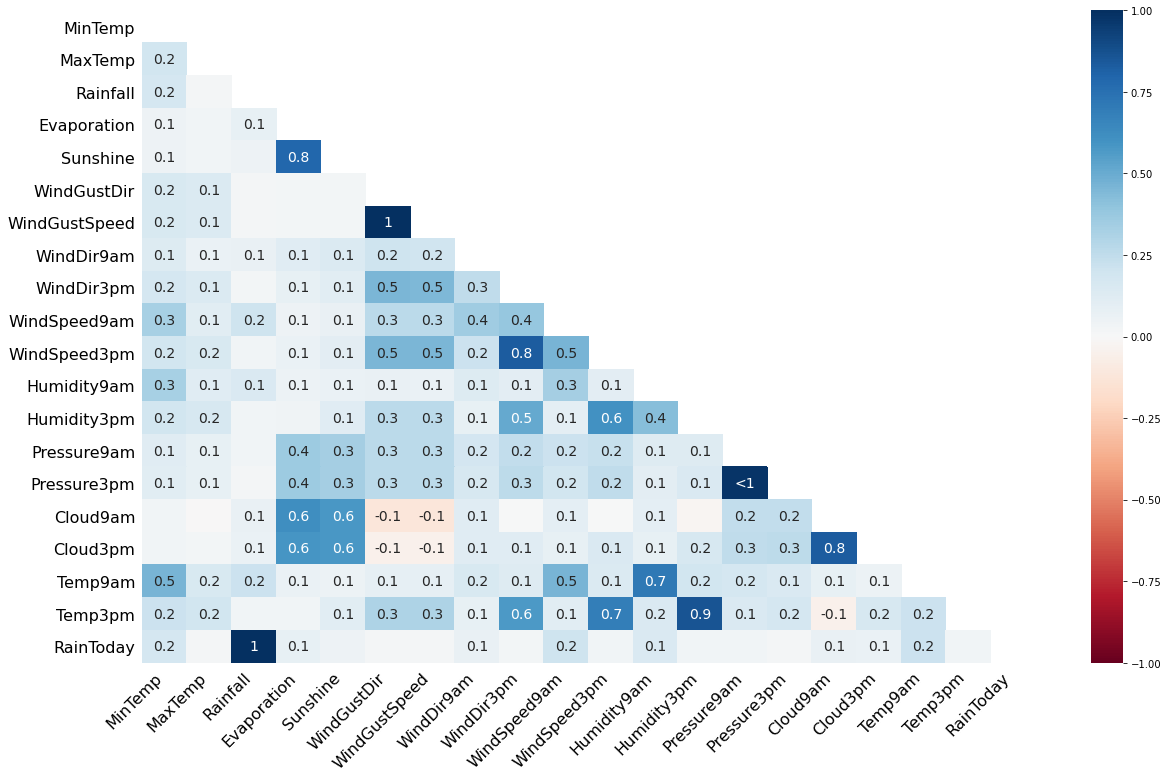

In [91]:
msno.heatmap(train) 

In [5]:
(train.dropna().shape[0])*100/(train.shape[0]) ## porcentaje filas borradas

39.67846518464341

In [31]:
infLWD= (filas_ori-train.shape[0])*train.shape[1]*100/iT
print("Información pérdida borrando filas",infLWD) 

Información pérdida borrando filas 63.71874952560873


In [69]:
## compruebo el tipo de columna
for col in  train.columns:
    print(col, type(train[col][0]))

Location <class 'sklearn.preprocessing._label.LabelEncoder'>
MinTemp <class 'numpy.float64'>
MaxTemp <class 'numpy.float64'>
Rainfall <class 'numpy.float64'>
Evaporation <class 'numpy.float64'>
Sunshine <class 'numpy.float64'>
WindGustDir <class 'str'>
WindGustSpeed <class 'numpy.float64'>
WindDir9am <class 'str'>
WindDir3pm <class 'str'>
WindSpeed9am <class 'numpy.float64'>
WindSpeed3pm <class 'numpy.float64'>
Humidity9am <class 'numpy.float64'>
Humidity3pm <class 'numpy.float64'>
Pressure9am <class 'numpy.float64'>
Pressure3pm <class 'numpy.float64'>
Cloud9am <class 'numpy.float64'>
Cloud3pm <class 'numpy.float64'>
Temp9am <class 'numpy.float64'>
Temp3pm <class 'numpy.float64'>
RainToday <class 'str'>
RISK_MM <class 'numpy.float64'>
RainTomorrow <class 'str'>


In [13]:
results = list()
train=train.dropna()
train = train.reset_index(drop=True)
## borro fecha por simplicidad
train=train.drop(['Date'],axis=1)

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in  train.columns:
    if type(train[col][0])== str:
        train[col] = le.fit_transform(train[col].astype(str))
data = train.values
ix = [i for i in range(data.shape[1]) if i != data.shape[1]-1]
X, y = data[:, ix], data[:, data.shape[1]-1]

cl = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]  
    
scores = cross_val_score(cl, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
cl.fit(X_train,y_train)
proba = cl.predict_proba(X_test)
proba = proba[:, 1]
delete_auc = roc_auc_score(y_test, proba)
delete1, delete2, _= roc_curve(y_test, proba)
print(mean(scores))

0.98219311866455


C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
## y si imputamos?
from random import seed
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from numpy import mean


train=pd.read_csv("weatherAUS.csv")
train=train.drop(['Date'],axis=1)

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in  train.columns:
    if type(train[col][0])== str:
        train[col] = le.fit_transform(train[col].astype(str))



df_scores= pd.DataFrame(columns=['Mean','Median','Most_frecuent','constant'])
seed(0)

strategies = ['LWD','mean', 'median', 'most_frequent', 'constant']

# split into input and output elements
data = train.values
ix = [i for i in range(data.shape[1]) if i != data.shape[1]-1]
X, y = data[:, ix], data[:, data.shape[1]-1]

for s in strategies[1:]:
        # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', LogisticRegression())])
        # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        # store results
    results.append(scores)
    print(s,mean(scores))
    
    
    X, y = data[:, ix], data[:, data.shape[1]-1]
    imp=SimpleImputer(strategy=s)
    imp.fit(X)
    X = imp.transform(X)
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]  
            
    model= LogisticRegression()
    model.fit(X_train,y_train)
    proba = model.predict_proba(X_test)
        
    if s=="mean":
        proba = proba[:, 1]
        mean_auc = roc_auc_score(y_test, proba)
        mean1, mean2, _= roc_curve(y_test, proba)
        print("AUROC", s , mean_auc)
            
    if s=="median":
        proba = proba[:, 1]
        median_auc = roc_auc_score(y_test, proba)
        median1, median2, _= roc_curve(y_test, proba)
        print("AUROC", s , median_auc)
            
    if s=="most_frequent":
        proba = proba[:, 1]
        moda_auc = roc_auc_score(y_test, proba) 
        moda1, moda2, _= roc_curve(y_test, proba)
        print("AUROC", s , moda_auc)
            
    if s=="constant":
        proba = proba[:, 1]
        cons_auc = roc_auc_score(y_test, proba)              
        cons1, cons2, _= roc_curve(y_test, proba)
        print("AUROC", s , cons_auc)

    


mean 0.9847718746219686


C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUROC mean 0.996736097158324
median 0.9806319476831964


C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUROC median 0.9980024443150478
most_frequent 0.9813187967958973


C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUROC most_frequent 0.9994353657834287
constant 0.9897603964265834
AUROC constant 0.9809780101227916


C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


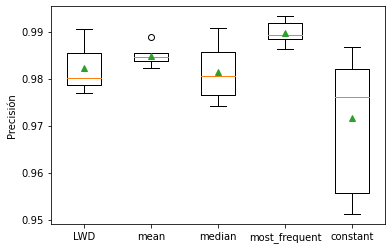

In [71]:
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.ylabel('Precisión')
pyplot.show()


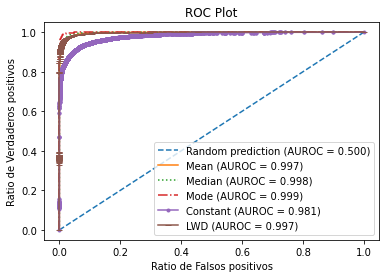

In [22]:
r_probs = [0 for _ in range(len(y_test))]
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
r_auc = roc_auc_score(y_test, r_probs) 


plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(mean1, mean2, linestyle='-', label='Mean (AUROC = %0.3f)' % mean_auc)
plt.plot(median1, median2, linestyle=':', label='Median (AUROC = %0.3f)' % median_auc)
plt.plot(moda1, moda2, linestyle='-.', label='Mode (AUROC = %0.3f)' % moda_auc)
plt.plot(cons1, cons2, marker='.', label='Constant (AUROC = %0.3f)' % cons_auc)
plt.plot(delete1, delete2, marker='_', label='LWD (AUROC = %0.3f)' % delete_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('Ratio de Falsos positivos')
plt.ylabel('Ratio de Verdaderos positivos')
# Show legend
plt.legend() # 
# Show plot
plt.show()

No se observa bien porque todas son muy buenas

In [19]:
results

[array([0.97692349, 0.98006062, 0.98298415, 0.97857181, 0.98676025,
        0.99064128, 0.9855373 , 0.97804009, 0.98021908]),
 array([0.98219334, 0.98499937, 0.98369095, 0.9846618 , 0.98544242,
        0.98329008, 0.98544242, 0.98438753, 0.98883896]),
 array([0.99071691, 0.98746783, 0.97487183, 0.97419722, 0.9805266 ,
        0.97643311, 0.9856956 , 0.98386008, 0.97999873]),
 array([0.98837504, 0.99006287, 0.98902884, 0.9917718 , 0.98835394,
        0.98930312, 0.99326976, 0.98626524, 0.99175053]),
 array([0.95525128, 0.98048441, 0.98208747, 0.97181316, 0.95558884,
        0.98675022, 0.98647622, 0.97605384, 0.95122054])]

In [9]:
## y si imputamos con métodos más avanzados? no se puede porque son muy pesados.

train=pd.read_csv("weatherAUS.csv")
train=train.drop(['Date'],axis=1)
train=train.dropna()
train = train.reset_index(drop=True)


le = preprocessing.LabelEncoder()

for col in  train.columns:
    if type(train[col][0])== str:
        train[col] = le.fit_transform(train[col].astype(str))



results_2 = list()
strategies_2 = ['Lasso','Ridge','KNN']


# split into input and output elements
data = train.values
ix = [i for i in range(data.shape[1]) if i != data.shape[1]-1]
X, y = data[:, ix], data[:, data.shape[1]-1]


In [10]:

for s in strategies_2:
    if s=="Lasso":
        pipeline = Pipeline(steps=[('i',IterativeImputer(estimator=linear_model.Lasso(alpha=0.1),max_iter=10, random_state=0)), ('m', LogisticRegression())])
    if s=="Ridge":
        pipeline = Pipeline(steps=[('i',IterativeImputer(estimator= Ridge(alpha=0.1), max_iter=10, random_state=0)), ('m', LogisticRegression())])
    if s=='KNN':
        pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=3)), ('m', LogisticRegression())])
        # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
            # store results
    results_2.append(scores)
    print(s,mean(scores))

Lasso 0.98219311866455
Ridge 0.98219311866455
KNN 0.98219311866455


Eliminamos columnas con demasiada data faltante primero

In [42]:
train=pd.read_csv("weatherAUS.csv")
listanas=train.isnull().sum()

In [47]:
na_col= listanas["Evaporation"]+listanas["Sunshine"]+listanas["Cloud9am"]+listanas["Cloud3pm"]
info_per_col=train.shape[0]*4- na_col

In [48]:
train=train.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1)

<AxesSubplot:>

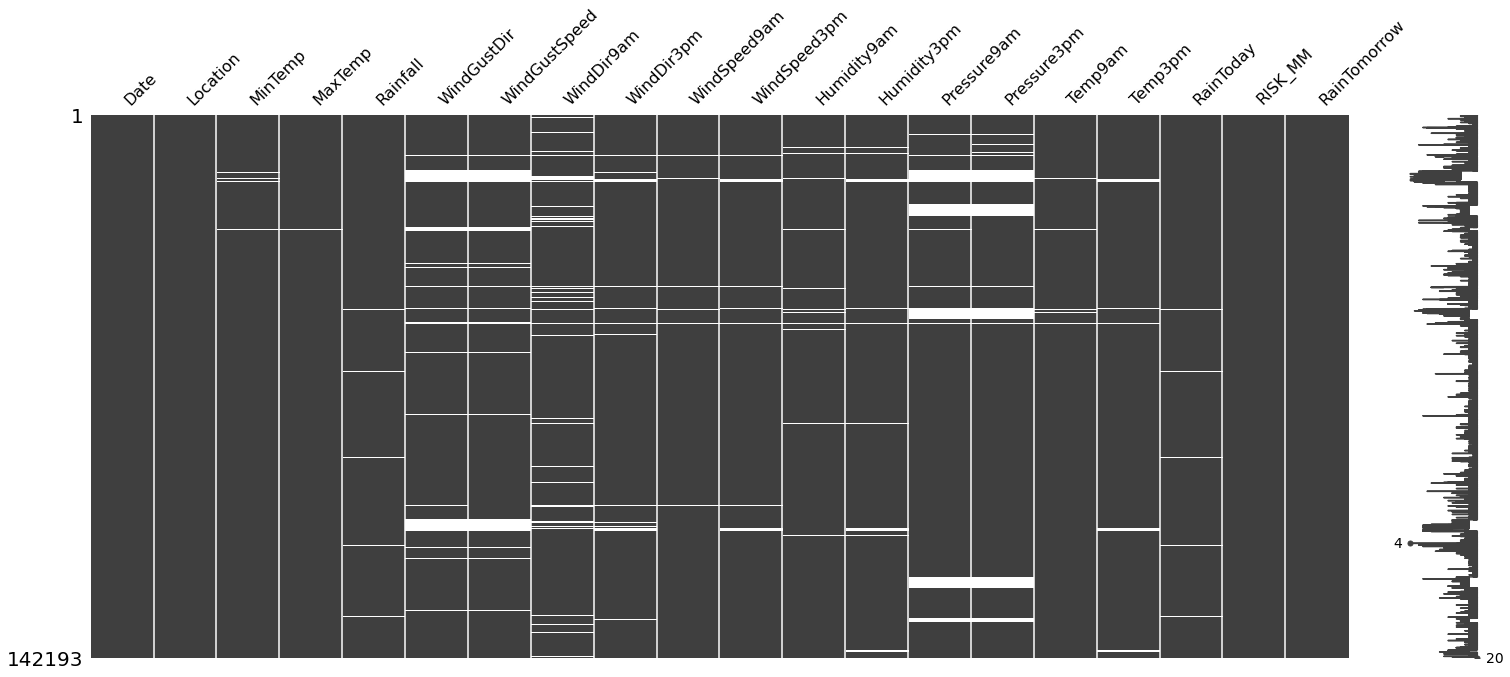

In [15]:
import missingno as msno 
msno.matrix(train)

In [49]:
infCol= info_per_col*100/iT
print("Información perdida borrando columnas primero",infCol) 

Información perdida borrando columnas primero 10.638056660808708


In [54]:
results = list()
train=train.dropna()
train = train.reset_index(drop=True)
## borro fecha por simplicidad
train=train.drop(['Date'],axis=1)

In [59]:
infLWD_Col= (filas_ori-train.shape[0])*train.shape[1]*100/iT
print("Información perdida borrando columnas primero",infLWD_Col+infCol) 

Información perdida borrando columnas primero 28.59926106393486


In [60]:
train=pd.read_csv("weatherAUS.csv")
train=train.drop(['Date'],axis=1)
train=train.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1)
results = list()
train=train.dropna()
train = train.reset_index(drop=True)

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in  train.columns:
    if type(train[col][0])== str:
        train[col] = le.fit_transform(train[col].astype(str))
        
data = train.values
ix = [i for i in range(data.shape[1]) if i != data.shape[1]-1]
X, y = data[:, ix], data[:, data.shape[1]-1]

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from numpy import mean


cl = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(cl, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
print(mean(scores))

0.9942144491181463


In [61]:
## y si borramos columnas primero 
from random import seed
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from numpy import mean


train=pd.read_csv("weatherAUS.csv")
train=train.drop(['Date'],axis=1)
train=train.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1)

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in  train.columns:
    if type(train[col][0])== str:
        train[col] = le.fit_transform(train[col].astype(str))



df_scores= pd.DataFrame(columns=['Mean','Median','Most_frecuent','constant'])
seed(0)

strategies = ['LWD','mean', 'median', 'most_frequent', 'constant']

# split into input and output elements
data = train.values
ix = [i for i in range(data.shape[1]) if i != data.shape[1]-1]
X, y = data[:, ix], data[:, data.shape[1]-1]

for s in strategies[1:]:
        # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', LogisticRegression())])
        # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        # store results
    results.append(scores)
    print(s,mean(scores))

mean 0.9945543383959031
median 0.9945871492641597
most_frequent 0.9926742623567844
constant 0.973758729377637


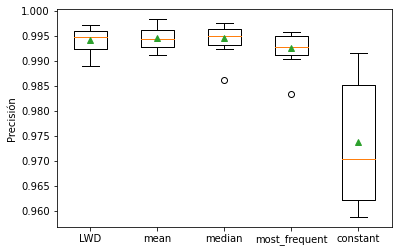

In [64]:
from matplotlib import pyplot
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.ylabel('Precisión')
pyplot.show()

In [20]:
316559*100/(142193*24)

9.276095400851894

No vale la pena imputar 